<img src = "https://drive.google.com/uc?export=view&id=1Jv3o3mNsR42VNsXVJEwasefophZ-TeD9" alt = "Encabezado MLDS" width = "100%">  </img>

#**Introducción al aprendizaje computacional y _scikit-learn_**
----

<img src = "https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/doc/logos/scikit-learn-logo.png" alt = "sklearn logo" width = "40%">  </img>

En este taller guiado haremos un acercamiento básico a varios de los pasos más importantes del aprendizaje computacional usando la librería especializada *Scikit-learn*.

Veremos cómo:

- cargar conjuntos de datos.
- preprocesar datos numéricos y categóricos.
- crear particiones de datos entrenamiento - prueba.
- entrenar modelos (regresión logística) para clasificación.
- evaluar el desempeño de modelos para clasificación.






## **1. Importar scikit-learn** <a class="anchor" id="section2"></a>
---


*Scikit-learn* es una librería especializada de aprendizaje computacional para el lenguaje de programación *Python*. Cuenta con múltiples paquetes y submódulos que serán importados en sus respectivas secciones. 

El paquete de *Python* de *Scikit-learn* de **`pip`** se debe instalar/actualizar con el nombre **`scikit-learn`**:




In [ ]:
# Usamos el gestor de paquetes pip para instalar 'scikit-learn'
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


> **Nota:** El nombre del módulo de *Python* NO es **`scikit-learn`**. Para importarlo se debe usar el nombre **`sklearn`**.

In [ ]:
# No se debe confundir el nombre al importar la librería.
import sklearn

La manera en que importe los paquetes y funciones es una elección personal. Por ejemplo, puede decidir importar todas las definiciones de un paquete:

In [ ]:
# Importa todas las definiciones dentro del submódulo "sklearn.datasets"
from sklearn.datasets import *

iris = load_iris()

Importar solo las necesarias:

In [ ]:
# Importa la definición "load_iris" del submódulo "sklearn.datasets"
from sklearn.datasets import load_iris

iris = load_iris

O importar un paquete y usar sus definiciones:

In [ ]:
# Importa el submódulo "sklearn.datasets"
from sklearn import datasets

iris = datasets.load_iris()

Además de *Scikit-learn*, utilizaremos algunas librerías de utilidad básicas del ecosistema de computación científica de *Python*.

In [ ]:
# Librerías NumPy, Pandas y Matplotlib para el análisis y manipulación de datos.

import numpy as np
import pandas as pd
import matplotlib as mpl

In [ ]:
# Versiones de Python, NumPy y Pandas.

!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.7.10
NumPy 1.19.5
Pandas 1.1.5
Matplotlib 3.2.2
Scikit-learn 0.24.1


Este material se realizó con las siguientes versiones:
*  *Python*: 3.7.10
*  *NumPy*:  1.19.5
*  *Pandas*:  1.1.5
*  *Matplotlib*:  3.2.2
*  *Scikit-learn*: 0.24.1

## **2. Cargar datos** <a class="anchor" id="section3"></a>
___

Los modelos de *Scikit-learn* aceptan datos numéricos almacenados en arreglos de *Numpy* o en matrices dispersas de *Scipy*. Otros tipos de datos convertibles a arreglos de *Numpy* también son aceptados, como listas y *DataFrames* de *Pandas*.

*Scikit-learn* ofrece funciones de utilidad para cargar una pequeña colección de populares conjuntos de datos, además de ofrecer funciones de utilidad para generar conjuntos de datos sintéticos.






### **2.1. Conjuntos de datos**
---

*Scikit-learn* ofrece funciones de utilidad en el paquete **`datasets`** para cargar conjuntos de datos populares, los cuales suelen ser usados para evaluar el desempeño de algoritmos de aprendizaje computacional. Estos conjuntos de datos suelen ser llamados "conjuntos de juguete" o *benchmark*.

#### **2.1.1. Loaders**
---
En el caso de conjuntos de datos pequeños, *scikit-learn* cuenta con una familia de funciones llamada *loaders*. Estos conjuntos de datos vienen incluidos con la instalación de *scikit-learn* y no implican un uso de red adicional para descargarlos. 

Por ejemplo, veamos uno de los conjuntos de datos más populares: el conjunto de datos de la familia de flores *Iris*. Usaremos la función **`sklearn.datasets.load_iris`**:

In [ ]:
# sklearn.datasets es el submódulo destinado a la carga de conjuntos de datos.
from sklearn import datasets

iris = datasets.load_iris()

print(type(iris))

<class 'sklearn.utils.Bunch'>


Como podemos ver, el conjunto de datos cargado pertenece a la clase **`sklearn.utils.Bunch`**. Los objetos *Bunch* son diccionarios que exponen sus llaves, como los subconjuntos del *dataset* y demás información descriptiva, en forma de atributos.

Veamos las llaves de **`iris`**:


In [ ]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


En este caso nos interesan las llaves **`data`**, **`target`**, **`target_names`** y **`feature_names`**.


Las llaves pueden ser accedidas a través de llaves cuadradas (**`[]`**) o como un atributo a través de la notación con punto (**`.`**).

In [ ]:
# Las dos líneas de código retornan lo mismo.
print(iris.feature_names)
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


*Iris* es un conjunto de datos para la clasificación de flores de la familia *Iris* en 3 especies distintas (setosa, versicolor y virginica).

In [ ]:
# target_names: Nombre de las etiquetas de la variable objetivo.
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Basado en la longitud y anchura de sus pétalos y sépalos en centímetros.

In [ ]:
# feature_names: Nombre de las variables o características.
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


En general, las *feature* o características hacen referencia a las variables que usaremos para entrenar nuestros modelos de aprendizaje computacional y predecir el *target* u objetivo, también llamado etiqueta. 

En aprendizaje computacional a un punto, instancia o muestra de un conjunto de datos se le da el nombre de **ejemplo**. Cuando un ejemplo tiene asociado una etiqueta se habla de **datos etiquetados** y cuando no, de **datos no etiquetados**.

En **aprendizaje supervisado** usamos datos etiquetados y algoritmos para entrenar modelos los cuales serán usados para predecir la etiqueta de ejemplos de los cuáles no se conoce la etiqueta.

Acabamos de ver los nombres de las características y los nombres de las posibles etiquetas del conjunto de datos *Iris*. Para acceder a los datos correspondientes a estos nombres y etiquetas debemos acceder a ellos a través de las llaves **`data`** y **`target`**.



La llave **`data`** es una matriz que contiene por cada ejemplo una fila con las 4 características mencionadas.

In [ ]:
print(iris.data.shape)

(150, 4)


La llave **`target`** es un vector que contiene la etiqueta para cada ejemplo.

In [ ]:
print(iris.target.shape)

(150,)


Como acabamos de ver, el conjunto de datos Iris cuenta con $150$ ejemplos y $4$ características. 

Por ejemplo, si quisiéramos saber las características de unos ejemplos y su etiqueta podemos hacer lo siguiente:

In [ ]:
# Lista de ids de los ejemplos que vamos a consultar
ids = [0, 25, 50, 100]

for i in ids:
  print(f'Ejemplo: {i}')
  print(f'Características: {iris.data[i]}, etiqueta: {iris.target[i]}\n')  

print('Nombres de las características:', iris.feature_names)
print('Nombres de las etiquetas:', iris.target_names)

Ejemplo: 0
Características: [5.1 3.5 1.4 0.2], etiqueta: 0

Ejemplo: 25
Características: [5.  3.  1.6 0.2], etiqueta: 0

Ejemplo: 50
Características: [7.  3.2 4.7 1.4], etiqueta: 1

Ejemplo: 100
Características: [6.3 3.3 6.  2.5], etiqueta: 2

Nombres de las características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nombres de las etiquetas: ['setosa' 'versicolor' 'virginica']


Las características están en el mismo orden que **`feature_names`**. Es decir, el ejemplo $100$ tiene:
* $6.3$ cm de longitud de sépalo (**`sepal length (cm)`**).
* $3.3$ cm de ancho de sépalo (**`sepal width (cm)`**).
* $6.0$ cm de longitud de pétalo (**`petal length (cm)`**).
* $2.5$ cm de ancho de pétalo (**`petal width (cm)`**).

También podemos observar que las etiquetas están representadas con números. 
De manera similar, están en el mismo orden que **`target_names`**. Es decir: 
* El ejemplo $0$ tiene etiqueta **`setosa`**.
* El ejemplo $50$ tiene etiqueta **`veriscolor`**.
* El ejemplo $100$ tiene etiqueta **`virginica`**.

***
En *Scikit-learn* es estándar manejar los datos en el formato **`X, y`**, donde **`X`** es una matriz donde las filas representan ejemplos y las columnas características y **`y`** es un vector que representa la etiqueta u variable objetivo. Podemos notar que **`X`** corresponde a la llave **`data`** y **`y`** a **`target`** en nuestro ejemplo anterior.

Usualmente, se tratará de convertir los datos que se tengan a este formato, con el objetivo de tenerlos listos para ser preprocesados y procesados por un algoritmo de aprendizaje computacional.

Por ejemplo, para obtener *Iris* en el formato **`X, y`** podríamos hacer lo siguiente:

In [ ]:
# Desempaquetado de tuplas a partir de los atributos.
X, y = iris.data, iris.target

Sin embargo, también es posible (y recomendado) cargar directamente el conjunto de datos en este formato con el argumento booleano **`return_X_y`**:

In [ ]:
# El argumento 'return_X_y' permite obtener directamente ambos arreglos.
X, y = datasets.load_iris(return_X_y=True)

#### **2.1.2. Fetchers**
---
En el caso de conjuntos de datos más grandes, *scikit-learn* ofrece la familia de funciones  *fetchers*. Estos conjuntos de datos no están incluidos en la instalación de *scikit-learn* y deben ser descargados con recursos de red.

Al ejecutar la siguiente celda notará que se hará un llamado para descargar el conjunto de datos *california housing* (regresión).

In [ ]:
# Los Fetcher también hacen parte del submódulo sklearn.datasets.
from sklearn import datasets

# Este tipo de funciones empieza con el prefijo '.fetch_'
california_housing = datasets.fetch_california_housing()

Al igual que muchos otros *fetchers* y *loaders*, el *dataset california_housing* es un objeto **`Bunch`** y puede ser cargado directamente en el formato **`X, y`** directamente.

In [ ]:
print(type(california_housing))

<class 'sklearn.utils.Bunch'>


In [ ]:
# Lo cargamos en formato X, y con el argumento 'return_X_y'.
X, y = datasets.fetch_california_housing(return_X_y=True)

### **2.2. Conjuntos de datos sintéticos**
---

*Scikit-learn* permite generar una serie de conjuntos de datos sintéticos, los cuales pueden ser útiles para probar el desempeño de un algoritmo de aprendizaje computacional. Estos métodos, a diferencia de los *loaders* y *fetchers* no retornan un objeto **`Bunch`** sino un conjunto de datos en el formato **`X, y`**.

Veamos algunos ejemplos. Graficaremos los resultados con *matplotlib*:

In [ ]:
# Importamos y configuramos la librería de visualización Matplotlib.
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 110

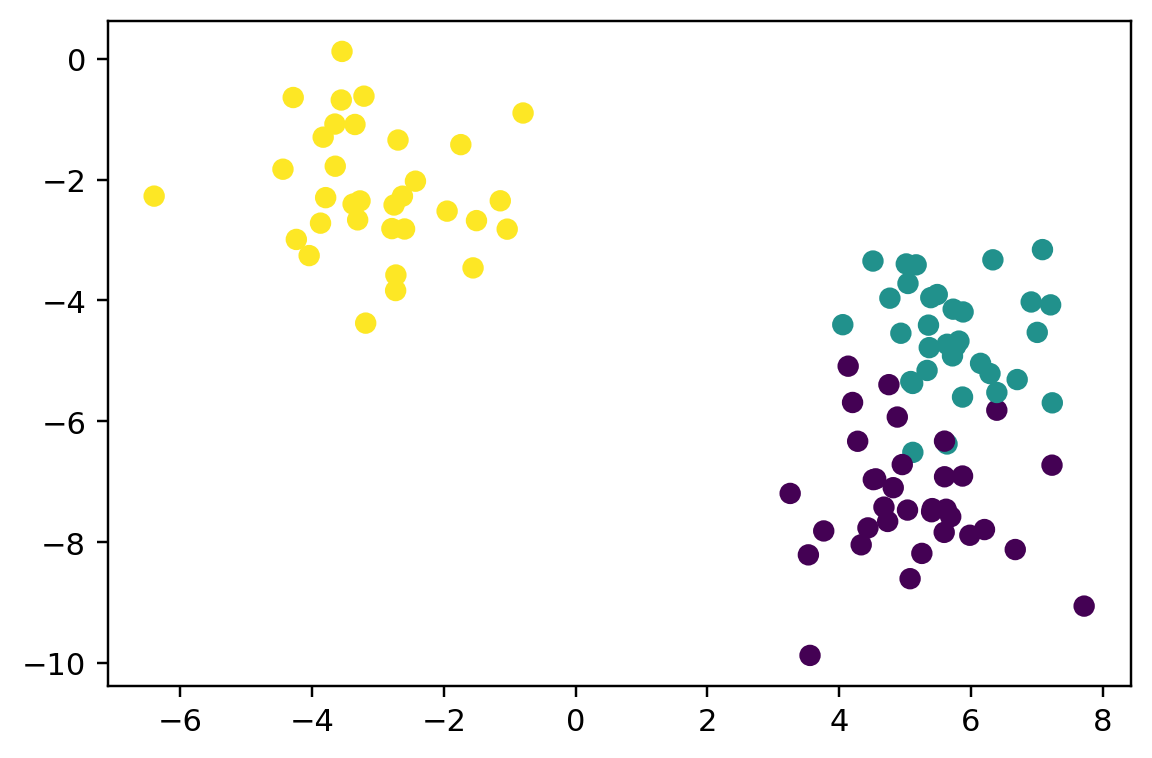

In [ ]:
# Conjunto de datos Blobs
X, y = datasets.make_blobs()

plt.scatter(X[:,0], X[:,1], c=y);

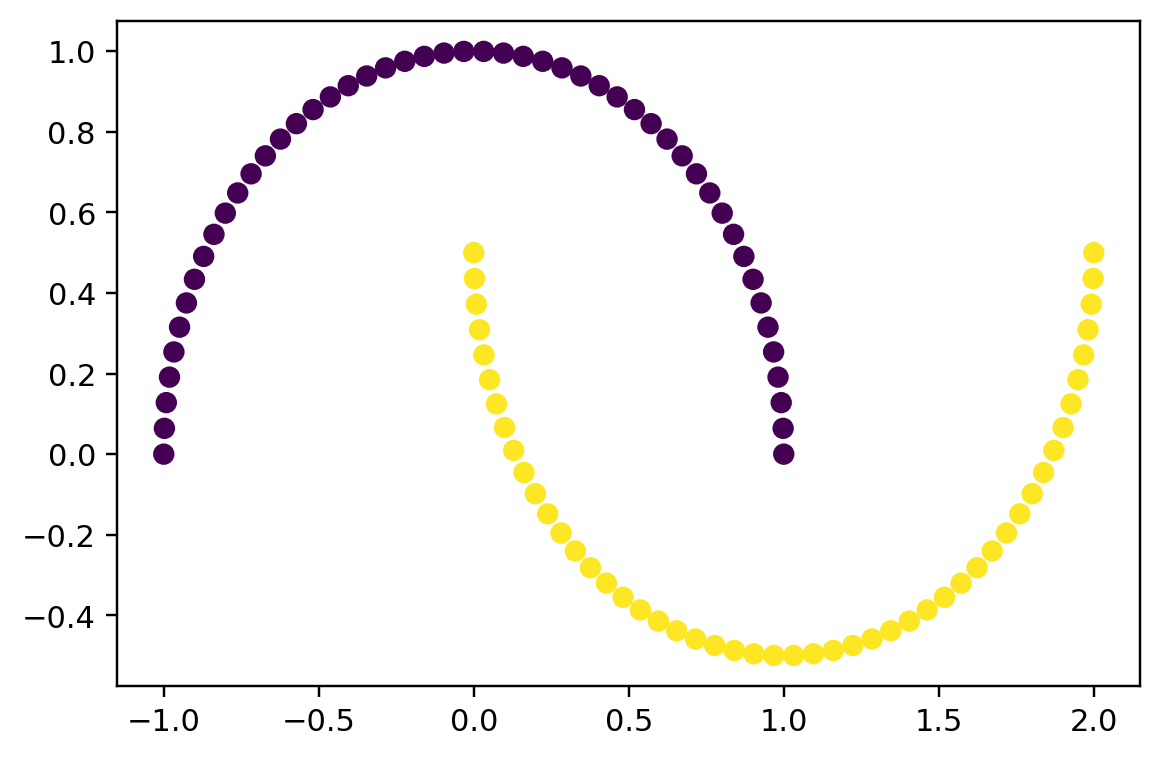

In [ ]:
# Conjunto de datos Moons
X, y = datasets.make_moons(n_samples=100)

plt.scatter(X[:,0], X[:,1], c=y);

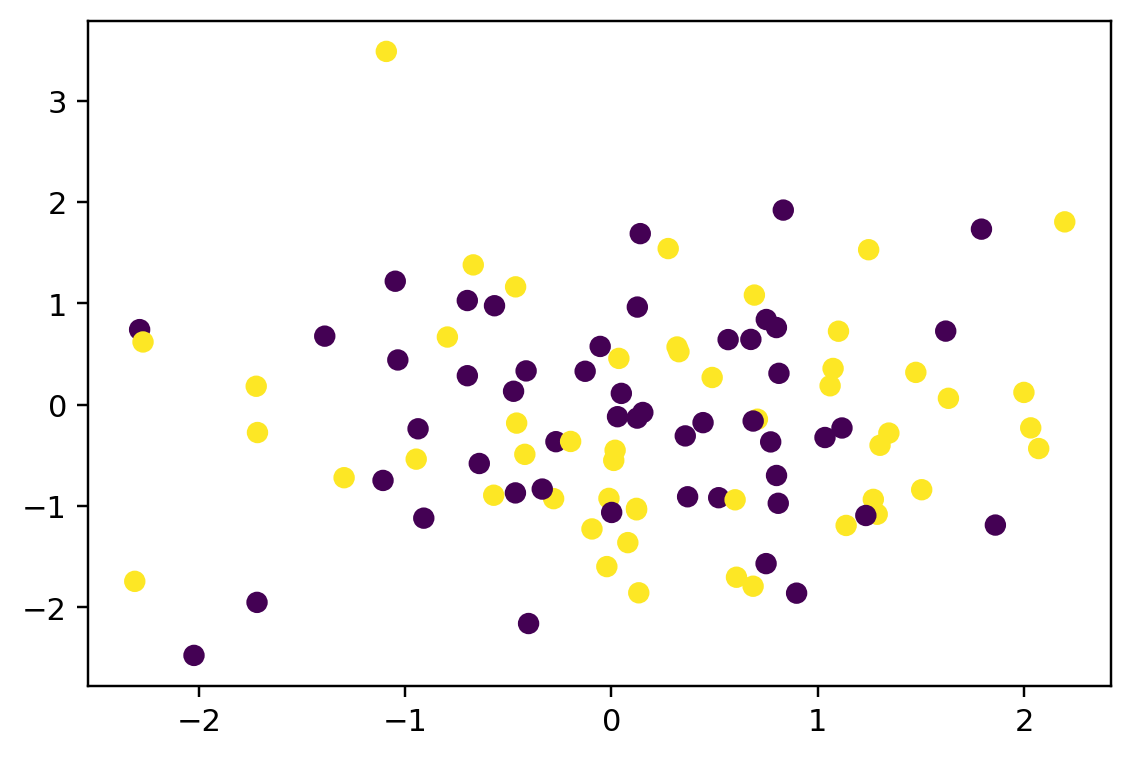

In [ ]:
# Conjunto de datos para clasificación.
X, y = datasets.make_classification()

plt.scatter(X[:,0], X[:,1], c=y);

Los conjuntos de datos generados de esta manera son generados de manera aleatoria, es decir, en cada ocasión será generado un conjunto de datos potencialmente distinto.

Para generar el mismo conjunto de datos puede fijar la semilla con el argumento **`random_state`**:

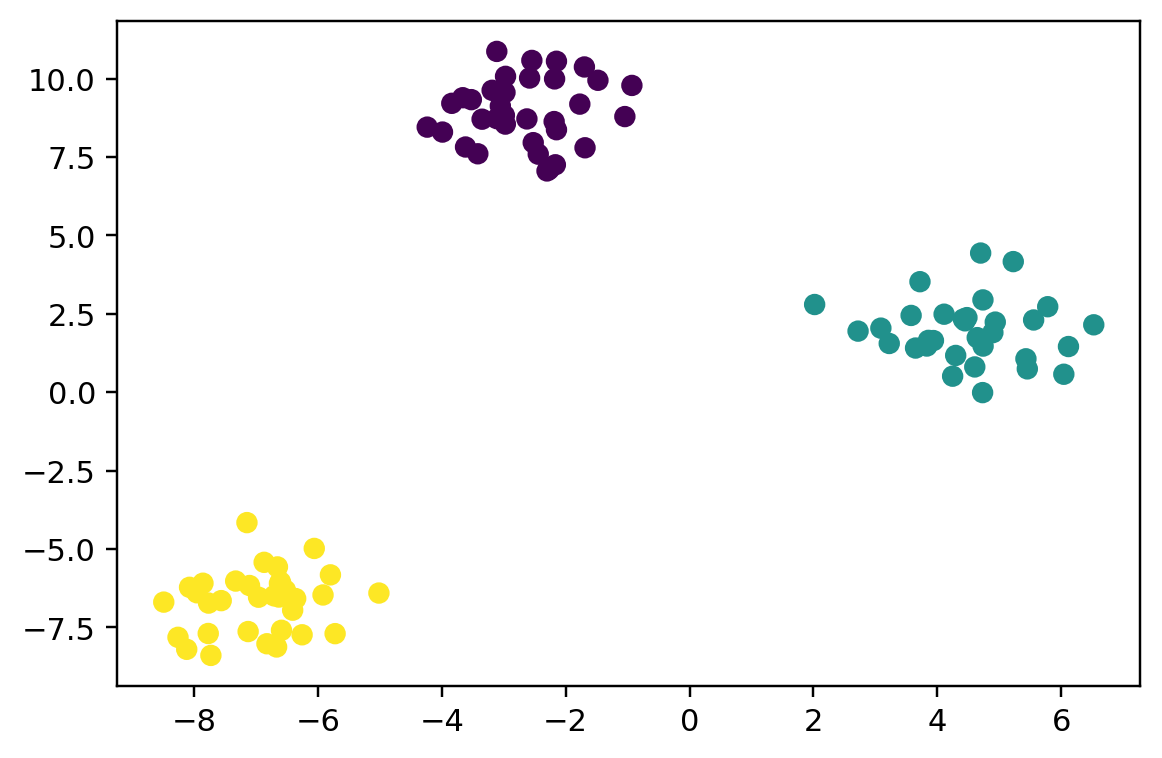

In [ ]:
# No importa cuantas veces lo ejecute, el resultado siempre será el mismo.
X, y = datasets.make_blobs(random_state=42)

plt.scatter(X[:,0], X[:,1], c=y);

### **2.3. Conjuntos de datos de archivos externos**
___

*Scikit-learn* permite usar *DataFrames* de *Pandas* como entrada para sus algoritmos de preprocesamiento y aprendizaje computacional. 

De aquí en adelante trabajaremos con el conjunto de datos *Titanic* para realizar preprocesamiento, entrenamiento y evaluación del desempeño.

A continuación cargamos *Titanic* como un *DataFrame* de *Pandas* usando la función **`pd.read_csv`**. Esta permite leer archivos separados por comas y cargarlos en objetos de tipo **`DataFrame`**.

In [ ]:
# Librería de análisis y manipulación de datos Pandas.
import pandas as pd 

# Usamos una url remota para cargar nuestro conjunto.
titanic_url = 'https://raw.githubusercontent.com/JuezUN/datasets/master/titanic.csv'
titanic_df = pd.read_csv(titanic_url)

Podemos ver información general del conjunto de datos con el método **`info`** de *Pandas*:

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


El dataset Titanic presenta un problema de clasificación. Se busca predecir la supervivencia de una persona basada en características como la clase del pasajero (**`Pclass`**), su género (**`Sex`**), su edad (**`Age`**), el número de hermanos y pareja a bordo, (**`SibSp`**), el número de padres e hijos a bordo (**`Parch`**), entre otras.

Para mantener las cosas sencillas eliminaremos la variable **`Cabin`** ya que presenta muchos datos faltantes y luego eliminaremos los registros que contentan valores faltantes en algunas de las columnas restantes. También eliminaremos la variable **`PassengerId`** ya que es un identificador y no una variable propia de los ejemplos.

In [ ]:
df_full = titanic_df.drop(['Cabin', 'PassengerId'], axis=1) # Eliminamos las columnas Cabin y PassengerId.
df_nona = df_full.dropna(axis=0) # Eliminamos los ejemplos con valores faltantes.

print(df_nona.shape)

(712, 10)


Para convertir el *DataFrame* de Titanic en el formato **`X, y`** podemos hacer lo siguiente:

In [ ]:
X = df_nona.drop(['Survived'], axis=1) # El conjunto de datos sin la variable objetivo 'Survived'.
y = df_nona['Survived']  # La columna de la variable objetivo 'Survived'.

print(X.shape)
print(y.shape)

(712, 9)
(712,)


Podemos ver que el conjunto de datos resultante tiene $712$ ejemplos con $9$ características.  

No incluimos **`Survived`** en **`X`** porque es la etiqueta que buscamos predecir. Incluirla sería un error conocido como **filtración de etiquetas**, que ocurre cuando se incluyen características durante el entrenamiento que proporcionan información de la etiqueta (o la misma etiqueta), que podría no estar disponible durante el tiempo de predicción. Imagínese entrenar un modelo para predecir la etiqueta, pero necesitarla como dato de entrada.

Aunque *Scikit-learn* acepta objetos convertibles a arreglos de *NumPy* como *DataFrames* y listas. Nos adelantaremos y convertiremos **`X`** y **`y`** en arreglos de NumPy.



In [ ]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Primero veamos como convertir un objeto de *Pandas* a un arreglo de *NumPy*, esto se logra con el atributo **`values`** de un *DataFrame* o una *Serie*.

In [ ]:
# .values retorna un arreglo de NumPy.
y = y.values

Separaremos **`X`** en dos arreglos de *NumPy*. Guardaremos las variables numéricas en **`X_numeric`** y las variables categóricas en **`X_categoric`**.

Las variables numéricas del conjunto de datos son: **`Age`**, **`SibSp`**, **`Parch`**, y **`Fare`**.

In [ ]:
numeric = ['Age', 'SibSp', 'Parch', 'Fare']

# .values retorna un arreglo de NumPy.
X_numeric = X[numeric].values

print(X_numeric.shape)
print(type(X_numeric))

(712, 4)
<class 'numpy.ndarray'>


Veamos algunos ejemplos:

In [ ]:
for i in range(5):
  print(f'Ejemplo {i}:')
  print('Variables:', X_numeric[i])
  print('Etiqueta:', y[i])
  print()

Ejemplo 0:
Variables: [22.    1.    0.    7.25]
Etiqueta: 0

Ejemplo 1:
Variables: [38.      1.      0.     71.2833]
Etiqueta: 1

Ejemplo 2:
Variables: [26.     0.     0.     7.925]
Etiqueta: 1

Ejemplo 3:
Variables: [35.   1.   0.  53.1]
Etiqueta: 1

Ejemplo 4:
Variables: [35.    0.    0.    8.05]
Etiqueta: 0



Cómo podemos ver, son todas variables numéricas.


Las variables categóricas del conjunto de datos son: **`Pclass`**, **`Name`**, **`Sex`**, **`Ticket`** y **`Embarked`**. 

> Si bien **`Pclass`** está almacenada como un tipo numérico, representa una variable categórica ordinal.

Primero veamos cuántos valores únicos tiene cada una:

In [ ]:
categoric = ['Name', 'Ticket', 'Pclass', 'Sex', 'Embarked']

for var in categoric:
  print(f'Valores posibles de {var}: \t{X[var].nunique()}')

Valores posibles de Name: 	712
Valores posibles de Ticket: 	541
Valores posibles de Pclass: 	3
Valores posibles de Sex: 	2
Valores posibles de Embarked: 	3


No tendremos en cuenta **`Name`** y **`Ticket`** para el siguiente ejemplo por su gran cantidad de valores posibles. En este caso usaremos solamente las variables **`Pclass`**, **`Sex`** y **`Embarked`**.

In [ ]:
# .values retorna un arreglo de numpy
X_categoric = X[['Pclass', 'Sex', 'Embarked']].values

print(X_categoric.shape)
print(type(X_categoric))

(712, 3)
<class 'numpy.ndarray'>


Veamos algunos ejemplos:

In [ ]:
ids = [0, 1, 15, 20]

for i in ids:
  print(f'Ejemplo {i}:')
  print('Variables:', X_categoric[i])
  print('Etiqueta:', y[i])
  print()

Ejemplo 0:
Variables: [3 'male' 'S']
Etiqueta: 0

Ejemplo 1:
Variables: [1 'female' 'C']
Etiqueta: 1

Ejemplo 15:
Variables: [3 'male' 'Q']
Etiqueta: 0

Ejemplo 20:
Variables: [1 'male' 'S']
Etiqueta: 1



* Los valores $1$, $2$ y $3$ corresponden a la clase de viaje del pasajero de la variable **`Pclass`**.
* Los valores **`male`** y **`female`** corresponden a la variable **`Sex`** (género de la persona).
* Los valores **`S`**, **`C`** y **`Q`** corresponden a la variable **`Embarked`**. Estos indican el puerto de embarque que utilizó la persona, donde **`C = Cherbourg`**, **`Q = Queenstown`** y **`S = Southampton`**.


## **3. Preprocesamiento**
---
*Scikit-learn* expone el paquete **`preprocessing`** el cual contiene una serie de transformaciones para variables numéricas tanto como categóricas. 

La importancia del preprocesamiento radica en que puede potencialmente mejorar (o empeorar) el desempeño de los algoritmos de aprendizaje computacional. En el caso de variables categóricas para el caso de *Scikit-learn* no pueden ser usadas sin aplicar un preprocesamiento.

Las transformaciones de *Scikit-learn* son fáciles de usar. Estas implementan la interfaz **`Transformer`**, la cual expone los 3 siguientes métodos:

- **`fit(X)`**: *(del español ajustar)* permite aprender un conjunto de parámetros de **`X`** que son necesarios para aplicar la transformación (e.g la media, el mínimo o el máximo, el número de características, etc).

- **`transform(X)`**: *(del español transformar)* aplica el preprocesamiento a **`X`** y retorna **`X`** transformado.

- **`fit_transform(X)`**:*(del español ajustar y transformar)* aplica **`fit`** a **`X`** y retorna **`X`** transformado. Es utilizado como un atajo de una línea.

Algunas transformaciones no pueden usar **`transform`** sin haber usado **`fit`** previamente. De igual manera algunas transformaciones no necesitan parámetros y **`fit`** no tiene ningún efecto secundario.


En esta ocasión nosotros solo utilizaremos **`fit_transform`** para realizar el preprocesamiento.








### **3.1. Variables numéricas**
---
En esta ocasión introduciremos métodos de preprocesamiento numéricos bastante sencillos:

- **`StandardScaler`**
- **`MinMaxScaler`**


#### **3.1.1. `StandardScaler`**
---
Veamos primero **`StandardScaler`**:

Este permite aplicar la transformación:

$$X^{\prime} = \frac{X - \mu}{\sigma}$$

Donde:
- $\mu\,$: Media aritmética de los datos.
- $\sigma\,$: Desviación estándar de los datos.

La transformación produce un nuevo conjunto de datos centrado en $0$ y con una desviación estándar de $1$.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Declaramos el Transformer "StandardScaler"
X_numeric_standarized = scaler.fit_transform(X_numeric) # Transformamos la matriz "X_numeric"

Aunque **`X_numeric`** tiene varias características numéricas, la transformación se aplica a cada una de las columnas de manera independiente.

Veamos algunos ejemplos:

In [ ]:
for i in range(3):
  print('Ejemplo:', i)
  print('Original: ', X_numeric[i])
  print('Estandarizado: ', X_numeric_standarized[i])
  print()

Ejemplo: 0
Original:  [22.    1.    0.    7.25]
Estandarizado:  [-0.52766856  0.52251079 -0.50678737 -0.51637992]

Ejemplo: 1
Original:  [38.      1.      0.     71.2833]
Estandarizado:  [ 0.57709388  0.52251079 -0.50678737  0.69404605]

Ejemplo: 2
Original:  [26.     0.     0.     7.925]
Estandarizado:  [-0.25147795 -0.55271372 -0.50678737 -0.50362035]



#### **3.1.2. `MinMaxScaler`**
---
**`MinMaxScaler`** permite escalar los datos a un rango específico, es decir, si una característica se encuentra en el rango **`[min(X), max(X)]`** y el argumento **`feature_range = (0, 1)`**, entonces cada valor será escalado de tal manera que esté en el rango **`[0, 1]`**.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))  # Declaramos el Transformer "MinMaxScaler"
X_numeric_minmax = scaler.fit_transform(X_numeric) # Transformamos la matriz "X_numeric"

Al igual que **`StandardScaler`**, **`MinMaxScaler`** aplica su transformación a cada columna de manera independiente.

Veamos algunos ejemplos:


In [ ]:
for i in range(3):
  print('Ejemplo:', i)
  print('Original: ', X_numeric[i])
  print('MinMax: ', X_numeric_minmax[i])
  print()

Ejemplo: 0
Original:  [22.    1.    0.    7.25]
MinMax:  [0.27117366 0.2        0.         0.01415106]

Ejemplo: 1
Original:  [38.      1.      0.     71.2833]
MinMax:  [0.4722292  0.2        0.         0.13913574]

Ejemplo: 2
Original:  [26.     0.     0.     7.925]
MinMax:  [0.32143755 0.         0.         0.01546857]



In [ ]:
# Valores mínimo y máximo de todo el dataset.
X_numeric_minmax.min(), X_numeric_minmax.max()

(0.0, 1.0)

Como vemos, todos los valores están entre $0$ y $1$.

**`StandardScaler`** y **`MinMaxScaler`** realizan transformaciones similares y el desempeño de cada una es dependediente del conjunto de datos.

En nuestro ejemplo usaremos **`X_numeric_minmax`** para entrenar nuestros modelos.

### **3.2. Variables categóricas**
---

Típicamente, los modelos de aprendizaje computacional no aceptan como entrada variables categóricas las cuales pueden estar representadas con cadenas de texto. Antes de ser empleadas necesitan ser preprocesadas en valores numéricos.

En esta ocasión veremos un método muy popular conocido como *One Hot Encoding*.

Emplearemos *One Hot Encoding* sobre la variable **`Embarked`**.

*One Hot Encoding* codifica una variable con $n$ valores posibles enumerados como $1, 2, ..., n$ en un vector de tamaño $n$; donde la $i$-ésima posición del vector está asociada con el $i$-ésimo valor posible.

Asumiendo que un ejemplo tiene el $j$-ésimo valor posible de la variable original, se procesa de la siguiente manera:

- Se asigna 1 en la posición $j$.
- Se asigna 0 al resto.

La variable **`Embarked`** tiene los siguientes valores únicos: **`S, C, Q`**.

Lo verificamos con el método **`unique`** de *NumPy*.

In [ ]:
import numpy as np

# Obtenemos los valores únicos de un arreglo de NumPy con el método "unique".
print(np.unique(X_categoric[:,2]))

['C' 'Q' 'S']


Por lo tanto, al aplicar *One Hot Encoding* a los siguientes datos:

|Embarked|
|:--:|
|S|
|C|
|Q|
|C|

Se transformarían de la siguiente manera:

|S|C|Q|
|--|--|--|
|**1**|0|0|
|0|**1**|0|
|0|0|**1**|
|0|**1**|0|

*One Hot Encoding* se puede de usar de manera muy sencilla en *Scikit-learn* con el método **`OneHotEncoder`**:

Por defecto **`OneHotEncoder`** retorna matrices *sparse* de *SciPy*, una implementación que mejora el desempeño de las operaciones matriciales cuando se tienen muchas entradas de una matriz en $0$ (¡perfecto para One Hot Encoding!). 

Para mantener las cosas sencillas con **`sparse=False`** le podemos pedir a **`OneHotEncoder`** que retorne arreglos de *NumPy*.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)     # Declaramos el Transformer "OneHotEncoder".
X_categoric_onehot = enc.fit_transform(X_categoric) # Usamos "fit_transform" para obtener la matriz transformada.
print(X_categoric_onehot.shape)
print(type(X_categoric_onehot))

(712, 8)
<class 'numpy.ndarray'>


Cómo podemos ver, la variable **`Sex`** con $2$ valores únicos, la variable **`Pclass`** con $3$ valores únicos y la variable **`Embarked`** con $3$ valores únicos fueron transformadas en $8$ variables distintas en total.

Veamos algunos ejemplos:

In [ ]:
ids = [0, 1, 15, 20]
for i in ids:
  print('Ejemplo:', i)
  print('Original: ', X_categoric[i])
  print('One Hot: ', X_categoric_onehot[i])
  print()

Ejemplo: 0
Original:  [3 'male' 'S']
One Hot:  [0. 0. 1. 0. 1. 0. 0. 1.]

Ejemplo: 1
Original:  [1 'female' 'C']
One Hot:  [1. 0. 0. 1. 0. 1. 0. 0.]

Ejemplo: 15
Original:  [3 'male' 'Q']
One Hot:  [0. 0. 1. 0. 1. 0. 1. 0.]

Ejemplo: 20
Original:  [1 'male' 'S']
One Hot:  [1. 0. 0. 0. 1. 0. 0. 1.]



Antes de continuar al entrenamiento de modelos de aprendizaje computacional, usando *NumPy* juntaremos las variables numéricas preprocesadas y las variables categóricas preprocesadas en el arreglo **`X_full`**. Para esto usaremos la función **`np.concatenate`** para concatenar **`X_numeric_minmax`** y **`X_categoric_onehot`** a través del axis $1$ (columnas).



In [ ]:
import numpy as np

X_full = np.concatenate((X_numeric_minmax, X_categoric_onehot),
                        axis=1) # Concatenamos por el eje vertical (columnas)
print(X_full.shape)

(712, 12)


## **4. Entrenamiento de modelos** 
---

En esta sección entrenaremos dos modelos de regresión logística. 
- Uno utilizando solo las variables numéricas preprocesadas. 
- Otro usando las variables numéricas y categóricas, ambas preprocesadas. 

Generalmente los algoritmos de aprendizaje computacional son entrenados en una partición de **entrenamiento** (***train***) y probados en una partición de datos de **prueba** (***test***). 

- Los datos de **entrenamiento** son aquellos datos de los cuales el algoritmo aprende.
- Los datos de **prueba** son aquellos que se usan para estimar el desempeño del algoritmo en datos desconocidos por el modelo. 

Las particiones **NO** deben compartir datos. Con ayuda de *scikit-learn* podemos crear particiones de entrenamiento y prueba para hacer esto fácilmente.

### **4.1. Partición de entrenamiento y prueba**
---

*Scikit-learn* permite realizar una partición de entrenamiento y prueba fácilmente con la función **`train_test_split`** del paquete **`model_selection`**.

**`train_test_split(X, y)`** retorna una tupla **`X_train, X_test, y_train, y_test`** donde **`X_train, X_test`** son la partición entrenamiento - prueba de **`X`** y **`y_train, y_test`** son la partición de entrenamiento y prueba de **`y`**.

Tenga en cuenta que usted le puede poner cualquier nombre a las variables que retorna train_test_split, lo anterior es solo una convención.

Usando el parámetro **`test_size`** podemos indicar, con un número entre 0 y 1, el porcentaje de datos que deseamos usar para la partición de prueba.

Un ejemplo básico de uso, con $30\%$ de los datos para pruebas y $70\%$ para entrenamiento sería el siguiente:

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
```

En nuestro caso le indicamos a **`train_test_split`** que utilice el $30\%$ de los datos como datos de prueba y la utilizamos con **`X_numeric_minmax`** y **`X_full`**.

A continuación importamos **`train_test_split`** del submódulo **`sklearn.model_selection`**.

In [ ]:
# Submódulo de selección de modelos y partición de datos.
from sklearn.model_selection import train_test_split

Lo usamos sobre **`X_numeric_minmax`**:

In [ ]:
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_numeric_minmax, 
                                                                    y, 
                                                                    test_size=0.3, 
                                                                    random_state=42)

Y lo usamos sobre **`X_full`**:

In [ ]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, 
                                                                        y,
                                                                        test_size=0.3, 
                                                                        random_state=42)

**`train_test_split`** realiza la partición de manera aleatoria. Para especificar la semilla aleatoria se puede utilizar el parámetro **`random_state`**.

En este caso como tenemos dos versiones de **`X`** (**`X_numeric_minmax`** y **`X_full`**) y hemos utilizado la misma semilla aleatoria en ambos llamados de la función para asegurarnos que los ejemplos, aún con diferentes características, sean consistentes sobre cada partición.

Podemos verificar que efectivamente se respetó el ordenamiento:

In [ ]:
print(all(y_train_num == y_train_full))
print(all(y_test_num == y_test_full))

True
True


Para simplificar las cosas asignamos las variables **`y_train`** y **`y_test`**:

In [ ]:
y_train = y_train_num
y_test = y_test_num

### **4.2. Entrenamiento**
---

Debido a que el conjunto de datos *Titanic* plantea un problema de clasificación (supervivencia), usaremos un modelo de clasificación lineal llamado regresión logística. 

Los modelos de clasificación buscan discernir el grupo al que pertenece un ejemplo (i.e., predecir su etiqueta).

Un modelo de clasificación recibe un conjunto de variables **`x`** (características) y produce una salida **`y`** (etiqueta) la cual es la predicción del modelo. 

La salida de un modelo de clasificación suele estar codificada como un número. El numero está asociado a la clase (que el modelo predice) que pertenece el ejemplo.

Utilizaremos el modelo generado por la función **`LogisticRegression`** del paquete **`linear_model`** de *Scikit-learn*.

En *scikit-learn* los modelos suelen implementar la interfaz **`Estimator`** y **`Predictor`**. 

Por ahora nos interesa saber que:

- Los **`Estimator`** implementan **`fit(X, y)`**.
- Los **`Predictor`** implementan **`predict(X)`**.

Los modelos deben ser *ajustados* antes de ser utilizados para realizar cualquier predicción.

En *scikit-learn* entrenar un modelo de aprendizaje computacional es tan sencillo como importarlo, crear una instancia y utilizar **`fit`**.

> **Nota:** Para nuestro ejemplo, en el entrenamiento utilizaremos cada versión de **`X_train`** (**`X_train_num`** y **`X_train_full`**) con el objetivo de entrenar dos modelos distintos.

### **4.3. Clasificador de variables numéricas**
---

Primero entrenaremos una regresión logística utilizando únicamente las variables numéricas.

Importamos el paquete **`linear_model`** que incluye la clase **`LogisticRegression`**.

In [ ]:
# Submódulo de modelos lineales.
from sklearn import linear_model

Creamos una instancia de **`LogisticRegression`** y la guardamos en la variable **`clf_numeric`**.

In [ ]:
clf_numeric = linear_model.LogisticRegression()

**`clf_numeric`** no ha sido entrenado, para esto usamos el método **`fit`** con:
 - **`X_train_num`**: matriz con las características numéricas de la partición de entrenamiento. 
 - **`y_train`**: vector con las etiquetas de la partición de entrenamiento.

In [ ]:
clf_numeric.fit(X_train_num, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **4.4. Clasificador de variables numéricas y categóricas**
---
Para entrenar un segundo modelo con todas las variables numéricas y categóricas (preprocesadas) realizamos los siguientes pasos:

Creamos una instancia y la guardamos en **`clf_full`**:

In [ ]:
# Variables numéricas y categóricas.
clf_full = linear_model.LogisticRegression()

Utilizamos **`fit`** pero esta vez con **`X_train_full`**, la matriz con las características tanto numéricas como categóricas de la partición de entrenamiento. 

In [ ]:
clf_full.fit(X_train_full, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## **5. Evaluación** 
---

Calcularemos la exactitud y el error de cada clasificador entrenado en la partición de entrenamiento y prueba.

La exactitud se define como:

$$\text{exactitud} = \frac{\text{#ejemplos clasificados correctamente}}{\text{#ejemplos}}$$

y el error se define como:

$$\text{error} = 1.0\, - \text{exactitud}$$

En *scikit-learn* la **exactitud** se puede calcular mediante la función **`accuracy_score`** del paquete **`metrics`**.

> **Nota**: Se profundizará en distintas métricas de rendimiento en las unidades siguientes.

A continuación, importamos **`accuracy_score`**.

In [ ]:
from sklearn.metrics import accuracy_score

### **5.1. Clasificador variables numéricas**
---

Primero veamos algunas predicciones del modelo sobre la partición de prueba, para esto debemos usar el método **`predict`**:

In [ ]:
# El método predict se debería utilizar sobre un clasificador entrenado previamente.

y_pred = clf_numeric.predict(X_test_num) # Retorna un arreglo con la predicción de la variable objetivo por cada ejemplo.


for i in range(5):  
  print(f'Predicho: {y_pred[i]}, Etiqueta: {y_test[i]}\n')
  

Predicho: 0, Etiqueta: 1

Predicho: 0, Etiqueta: 1

Predicho: 0, Etiqueta: 0

Predicho: 1, Etiqueta: 1

Predicho: 0, Etiqueta: 0



Como podemos ver, el modelo solo se equivoca en $1$ de los primeros $5$ ejemplos. Note que **`predict`** acepta una matriz, un error común es tratar de usar **`predict`** con vectores.

Para calcular la exactitud sobre toda la partición de prueba utilizamos **`accuracy_score`**:

> **`accuracy_score`** recibe como primer parámetro las etiquetas reales y como segundo parámetro las etiquetas predichas.

In [ ]:
# Obtenemos la predicción del clasificador usando variables numéricas.
y_pred = clf_numeric.predict(X_test_num)

# Calculamos la exactitud de la predicción.
acc = accuracy_score(y_test, y_pred)

print(f'Exactitud en prueba {acc}')
print(f'Error en prueba: {1.0 - acc}')

Exactitud en prueba 0.6121495327102804
Error en prueba: 0.3878504672897196


Veamos las métricas sobre la partición de entrenamiento:

In [ ]:
# Obtenemos la predicción del clasificador usando tanto variables numéricas como categóricas.
y_pred = clf_numeric.predict(X_train_num)

# Calculamos la exactitud de la predicción.
acc = accuracy_score(y_train, y_pred)

print(f'Exactitud en entrenamiento {acc}')
print(f'Error en entrenamiento: {1.0 - acc}')

Exactitud en entrenamiento 0.6485943775100401
Error en entrenamiento: 0.3514056224899599


Como podemos ver, el error de entrenamiento es menor que el error de prueba.

### **5.2. Clasificador variables numéricas y categóricas**
---
Veamos las métricas sobre la partición de entrenamiento:

In [ ]:
y_pred = clf_full.predict(X_train_full)
acc = accuracy_score(y_train, y_pred)

print(f'Exactitud en entrenamiento {acc}')
print(f'Error en entrenamiento: {1.0 - acc}')

Exactitud en entrenamiento 0.8012048192771084
Error en entrenamiento: 0.1987951807228916


Veamos las métricas sobre la partición de prueba:

In [ ]:
y_pred = clf_full.predict(X_test_full)
acc = accuracy_score(y_test, y_pred)

print(f'Exactitud en prueba {acc}')
print(f'Error en prueba: {1.0 - acc}')

Exactitud en prueba 0.7757009345794392
Error en prueba: 0.22429906542056077


Cómo podemos ver incluir las variables categóricas mejora el desempeño del mismo algoritmo substancialmente. 

En *Titanic* un indicador de supervivencia muy importante es el género, una proporción mucho más grande de mujeres que de hombres sobrevivieron a la tragedia. Esto puede ser utilizado para interpretar la mejora de desempeño del modelo.

## **Recursos adicionales**
---
Los siguientes enlaces corresponden a sitios en donde encontrará información muy útil para profundizar en el conocimiento de las funcionalidades de la librería *Scikit-learn*:

- [*Scikit-learn - Datasets*](https://scikit-learn.org/stable/datasets.html)
- [*Scikit-learn - Preprocessing*](https://scikit-learn.org/stable/modules/preprocessing.html)
- [*Scikit-learn - Linear models*](https://scikit-learn.org/stable/modules/linear_model.html)

## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistentes docentes:**
  * Miguel Angel Ortiz Marín
  * Alberto Nicolai Romero Martínez

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*